In [49]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

In [50]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [52]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [53]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-06-18 00:00:00+00:00,9081.762695,15848210536,265.051849,6205242504,0.999952,15771300771,34.339508,484975596
2019-06-19 00:00:00+00:00,9273.521484,15546809946,269.431793,5516510947,1.002128,14726683847,35.287197,509791358
2019-06-20 00:00:00+00:00,9527.160156,17846823784,271.695007,6408981097,1.000227,17138142841,36.726063,636578809
2019-06-21 00:00:00+00:00,10144.556641,20624008643,294.910278,9331694140,1.002799,20328307388,38.815918,438604247
2019-06-22 00:00:00+00:00,10701.691406,29995204861,309.380310,10613731255,0.995817,29687375142,37.799755,428828573


In [54]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2024-06-14 00:00:00+00:00,66011.093750,27403884779,3480.271973,15793876596,0.999471,56734383862,603.180542,1848914113
2024-06-15 00:00:00+00:00,66191.000000,14121265576,3565.549561,12733651076,0.999467,35823242153,607.802917,1471028668
2024-06-16 00:00:00+00:00,66639.046875,13281140541,3620.563477,9878388158,0.999293,31962850043,610.054016,1428836675
2024-06-17 00:00:00+00:00,66490.296875,30006354476,3511.378906,17838856988,0.999645,60712949361,604.467346,1797626078
2024-06-18 00:00:00+00:00,65695.445312,36105760768,3443.921143,20039196672,1.000003,74087350272,592.189697,2132288256


In [55]:
data.shape

(1828, 8)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-06-18 00:00:00+00:00 to 2024-06-18 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1828 non-null   float64
 1   Volume (BTC)   1828 non-null   int64  
 2   Close (ETH)    1828 non-null   float64
 3   Volume (ETH)   1828 non-null   int64  
 4   Close (USDT)   1828 non-null   float64
 5   Volume (USDT)  1828 non-null   int64  
 6   Close (BNB)    1828 non-null   float64
 7   Volume (BNB)   1828 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 193.1 KB


In [57]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [58]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03
mean,29620.811300,3.080188e+10,1683.313313,1.520053e+10,1.000757,5.235340e+10,245.741358,1.240067e+09
std,17906.229692,1.787296e+10,1200.073601,9.825229e+09,0.002625,3.331174e+10,185.646085,1.413508e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.061036e+08
25%,11673.016357,1.895306e+10,383.789963,8.125494e+09,0.999994,2.827799e+10,28.549330,3.594180e+08
50%,27124.326172,2.726698e+10,1663.431824,1.296698e+10,1.000259,4.520501e+10,266.318756,7.061044e+08
75%,42535.953125,3.783943e+10,2488.011353,1.905282e+10,1.000856,6.633840e+10,350.316170,1.671068e+09
max,73083.500000,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,710.464050,1.798295e+10


#Exploratory Data Analysis

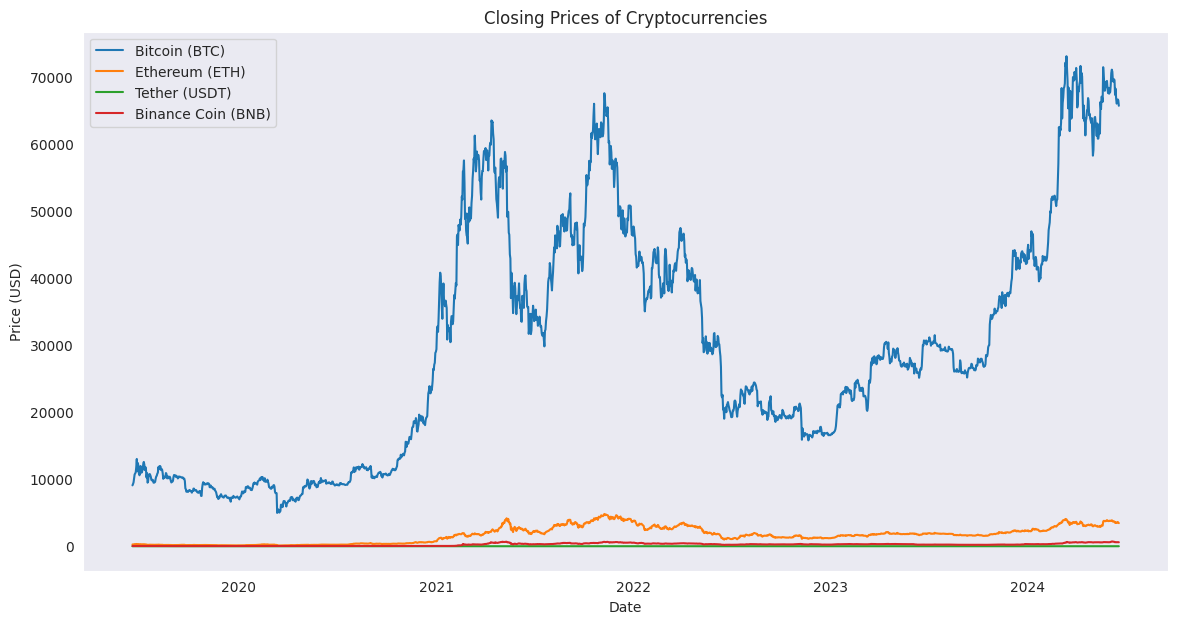

In [59]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

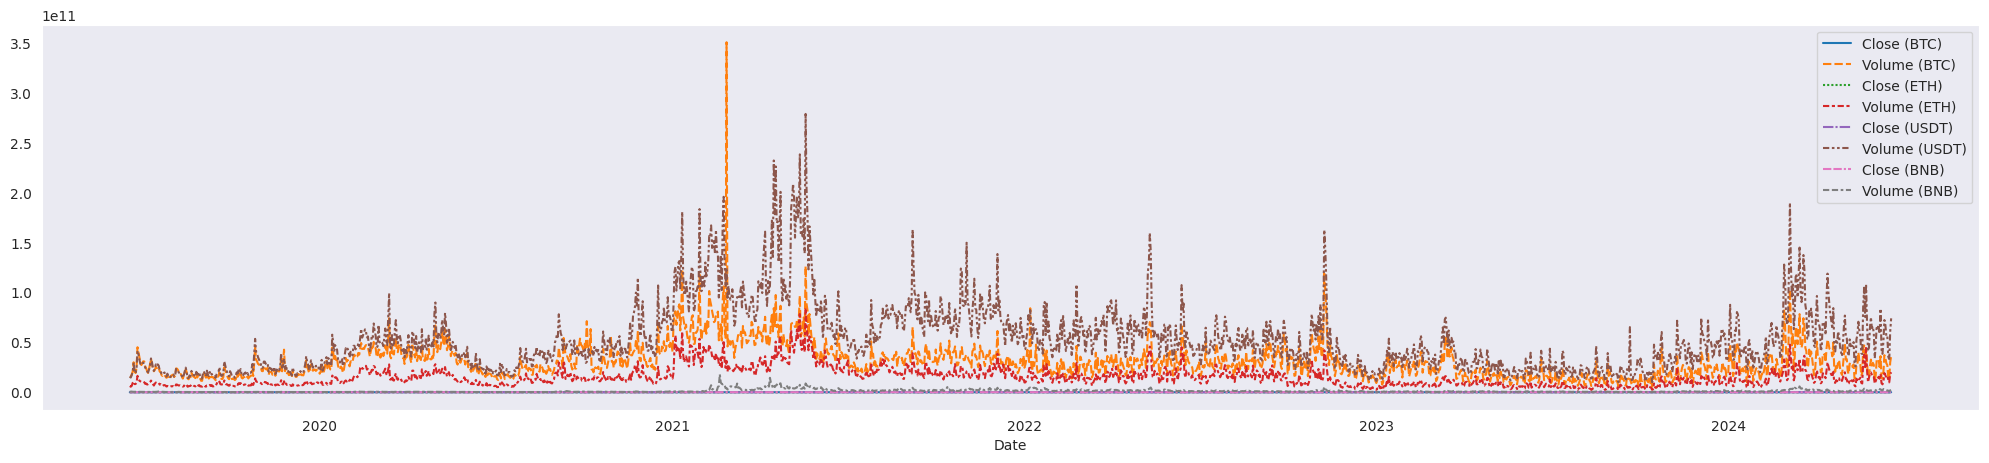

In [60]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

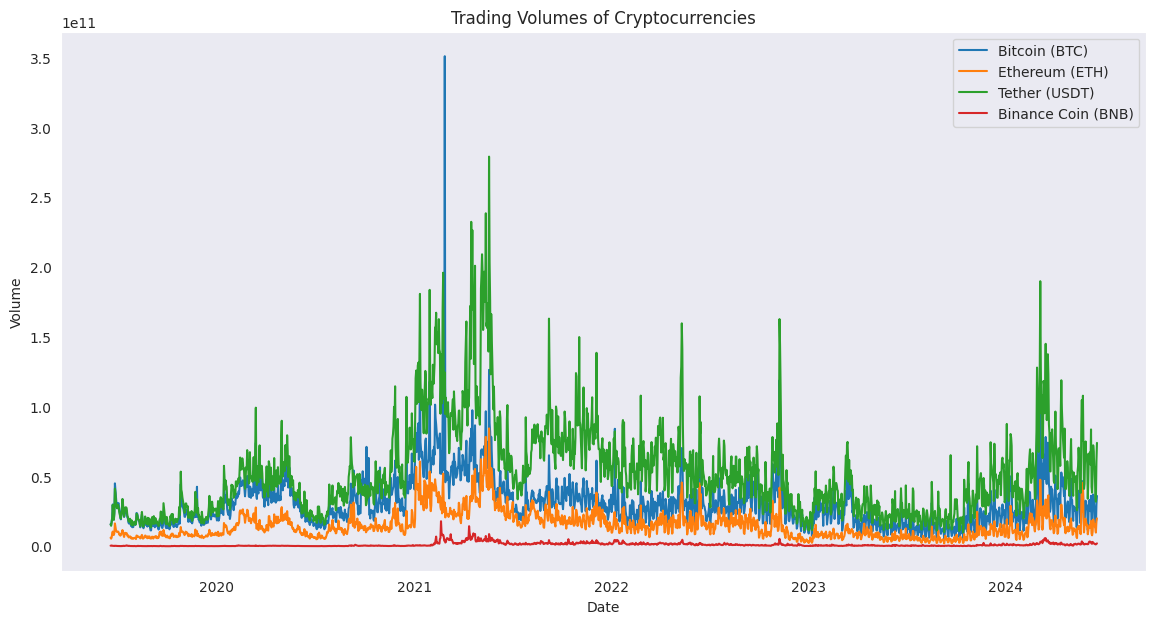

In [61]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



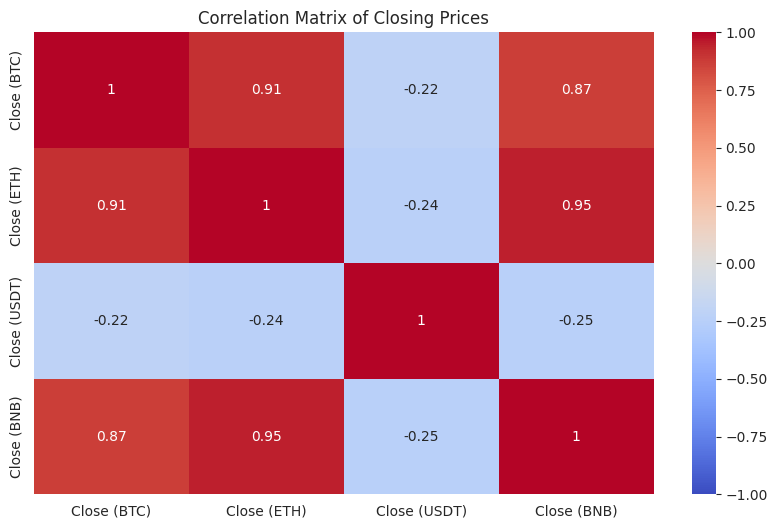

In [62]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


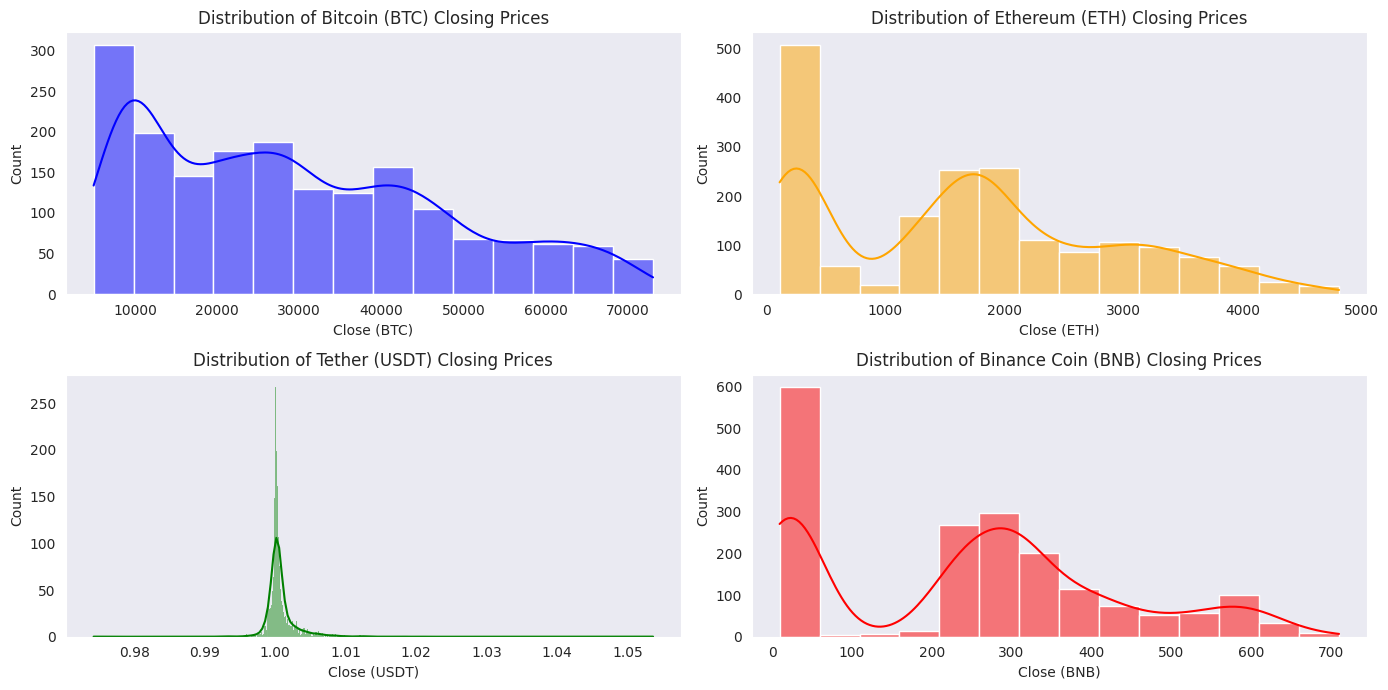

In [63]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

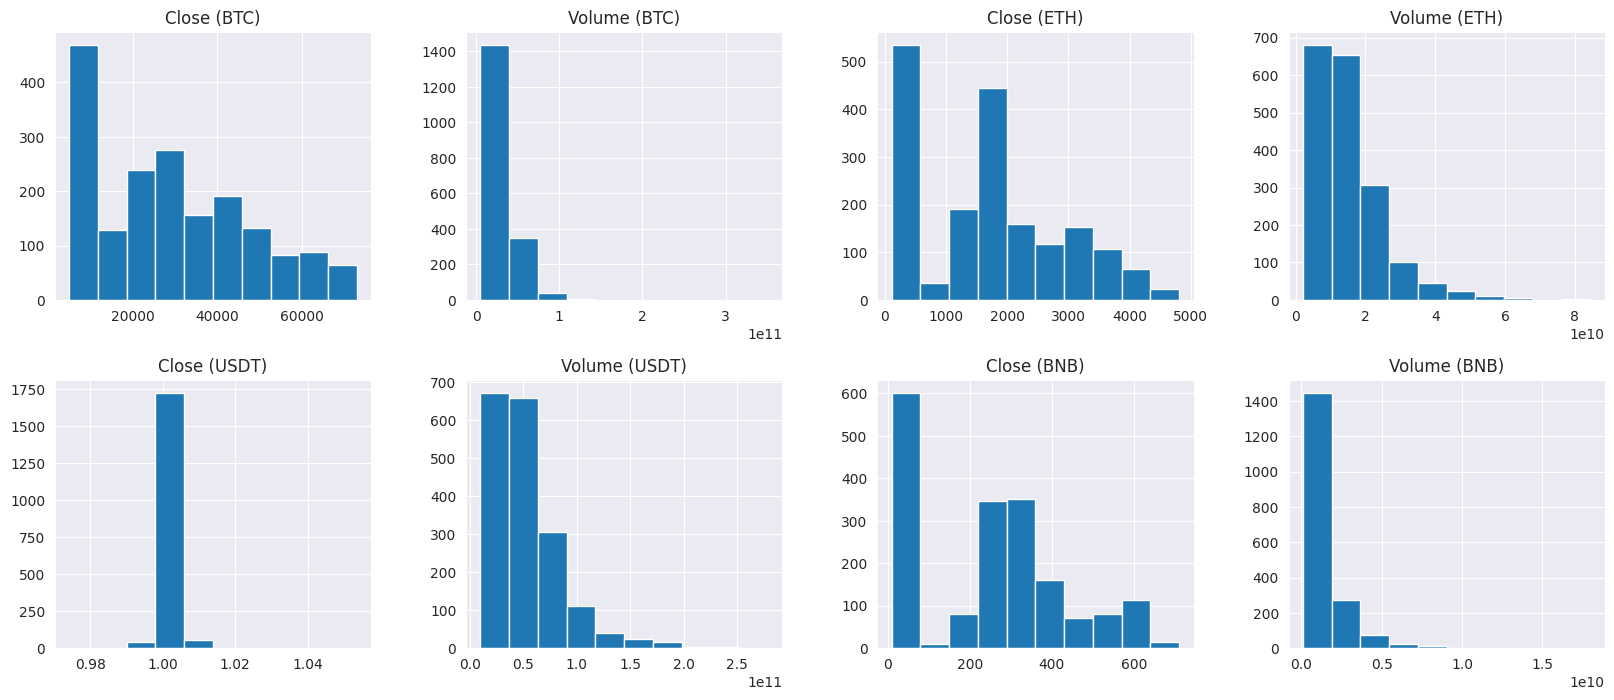

In [64]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

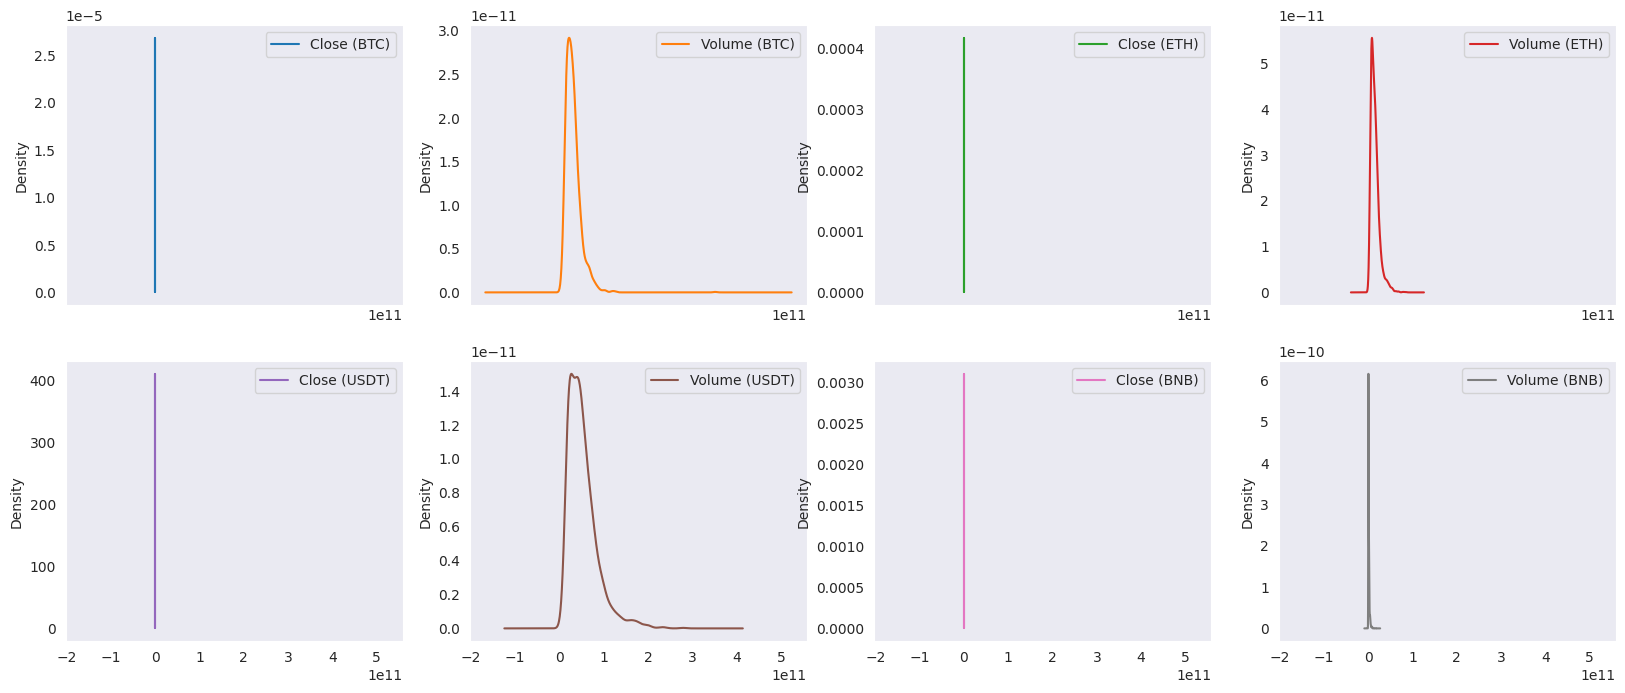

In [65]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

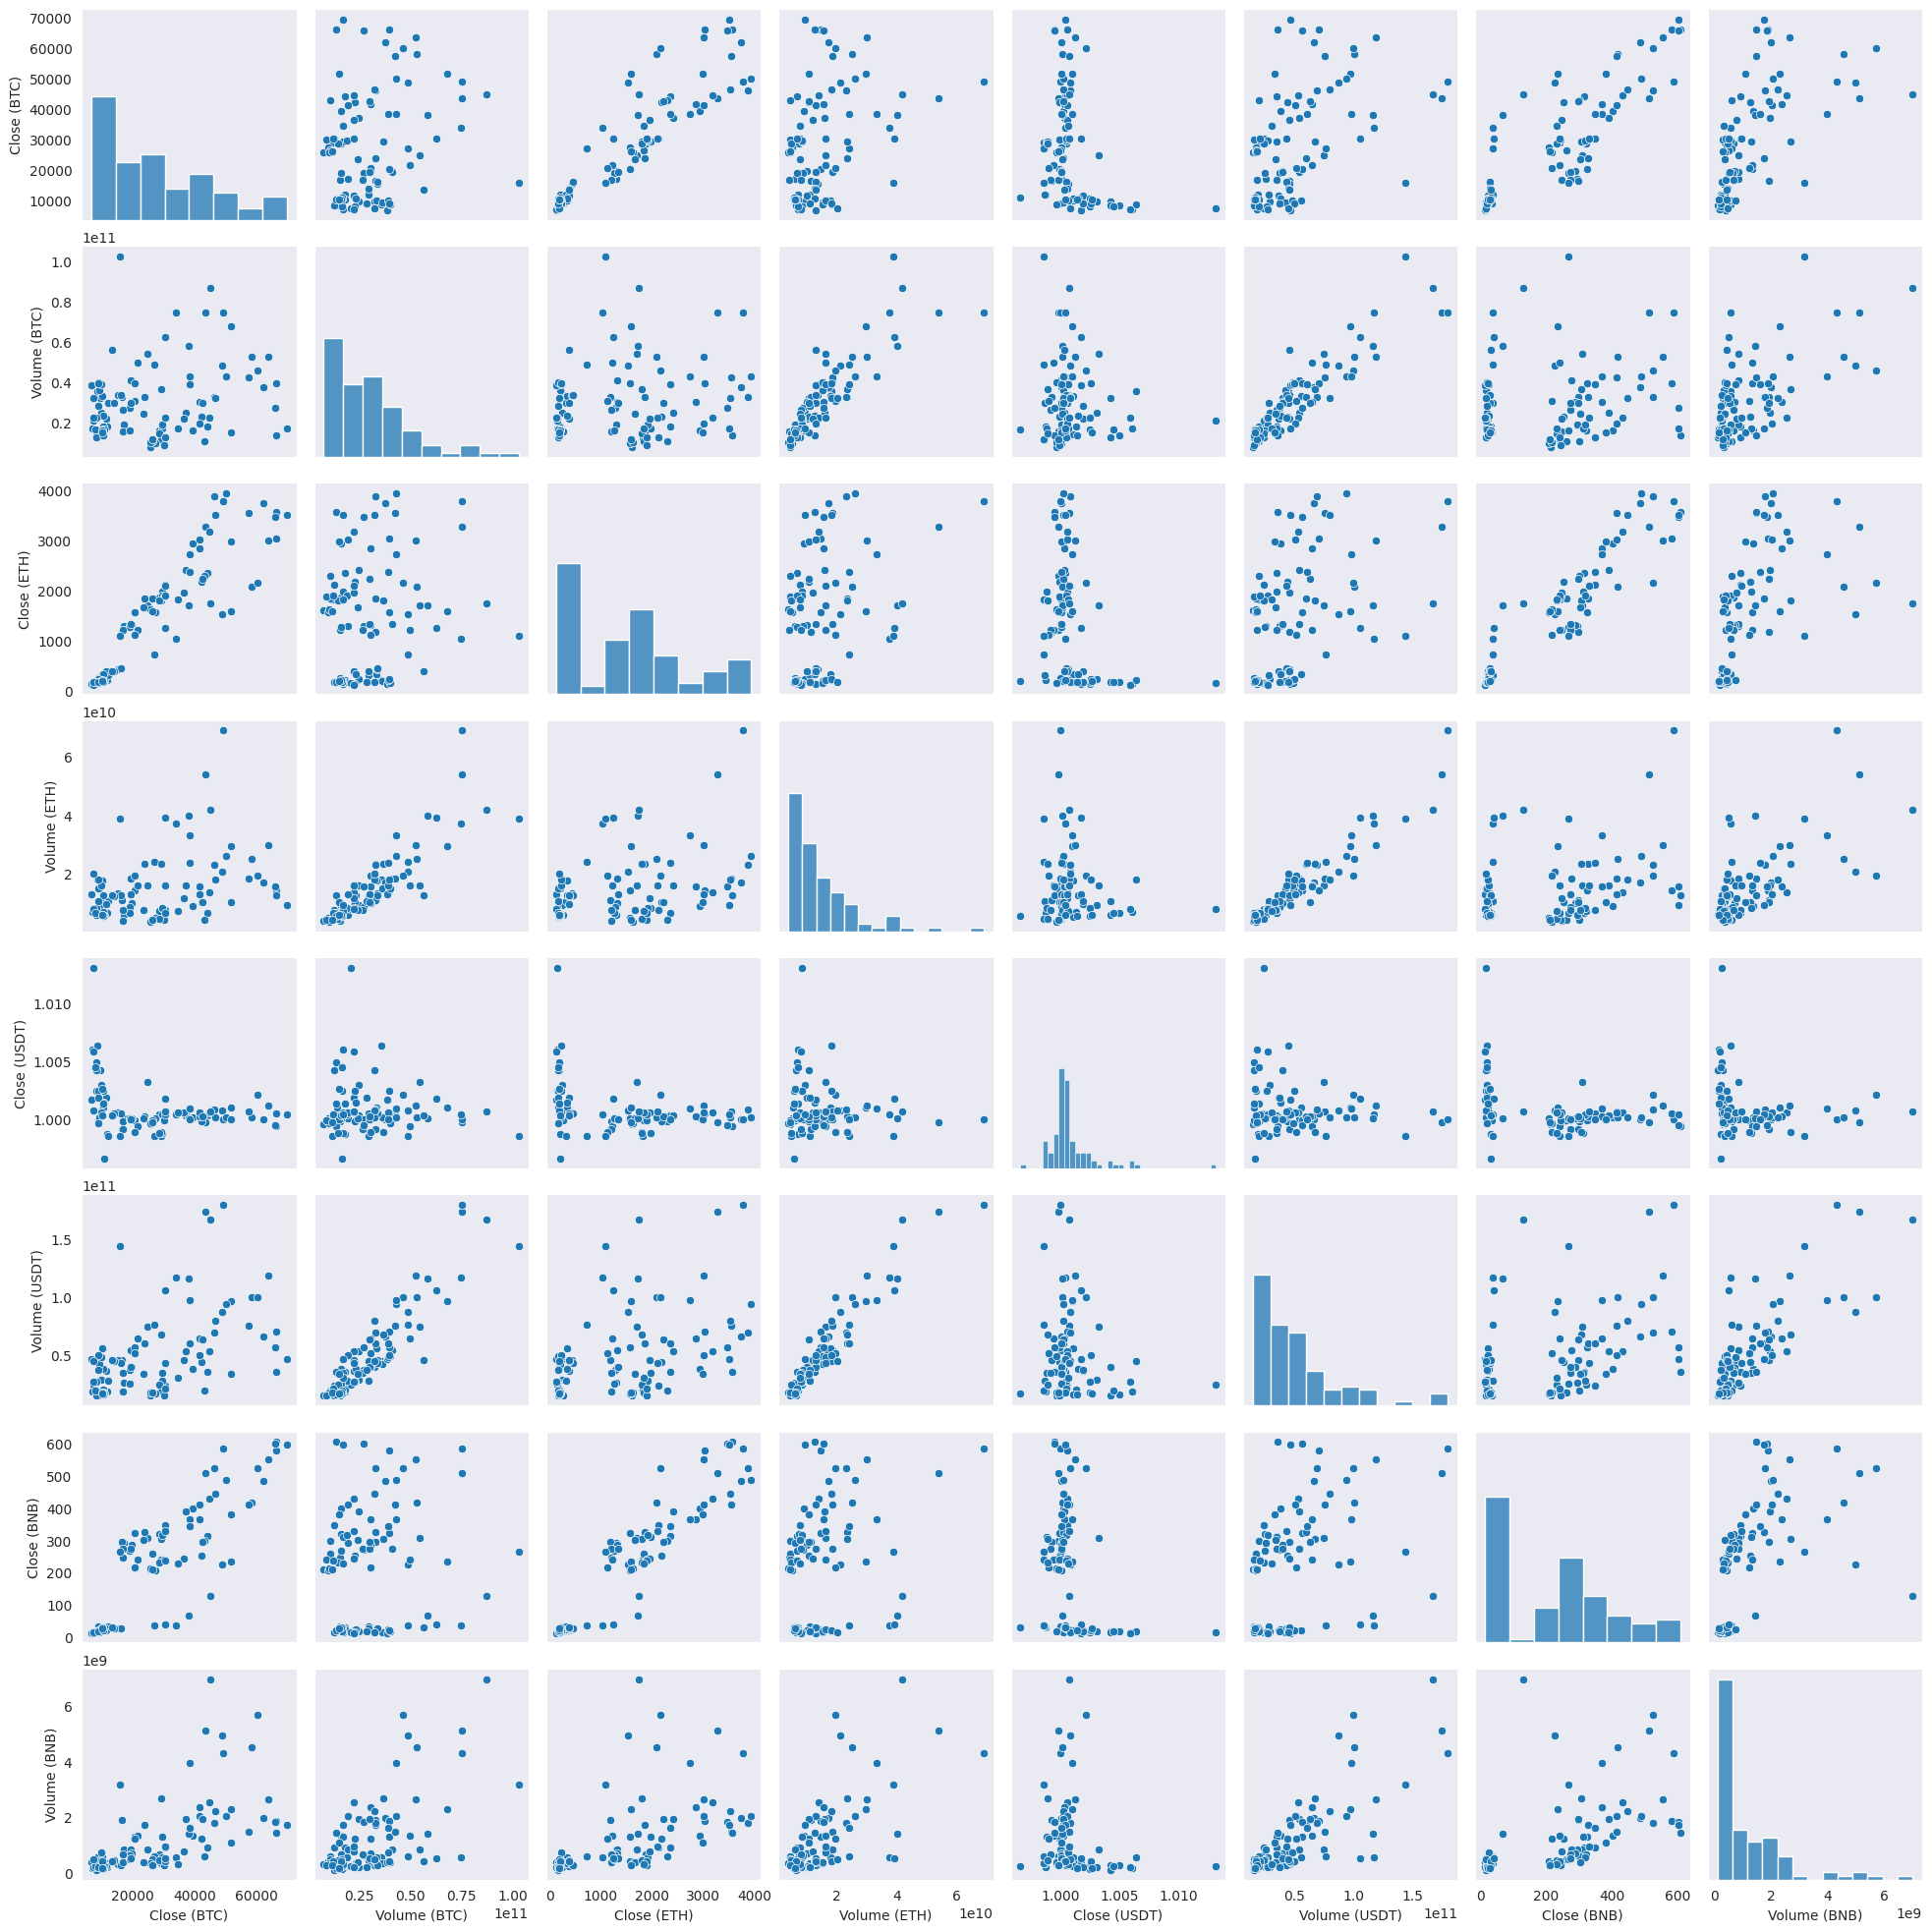

In [66]:
sns.pairplot(data.sample(n=100));


#Data Pre-processing

In [67]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [68]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2019-06-18 00:00:00+00:00,15848210536,265.051849,6205242504,0.999952,15771300771,34.339508,484975596
2019-06-19 00:00:00+00:00,15546809946,269.431793,5516510947,1.002128,14726683847,35.287197,509791358
2019-06-20 00:00:00+00:00,17846823784,271.695007,6408981097,1.000227,17138142841,36.726063,636578809
2019-06-21 00:00:00+00:00,20624008643,294.910278,9331694140,1.002799,20328307388,38.815918,438604247
2019-06-22 00:00:00+00:00,29995204861,309.380310,10613731255,0.995817,29687375142,37.799755,428828573


In [69]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2024-06-14 00:00:00+00:00,27403884779,3480.271973,15793876596,0.999471,56734383862,603.180542,1848914113
2024-06-15 00:00:00+00:00,14121265576,3565.549561,12733651076,0.999467,35823242153,607.802917,1471028668
2024-06-16 00:00:00+00:00,13281140541,3620.563477,9878388158,0.999293,31962850043,610.054016,1428836675
2024-06-17 00:00:00+00:00,30006354476,3511.378906,17838856988,0.999645,60712949361,604.467346,1797626078
2024-06-18 00:00:00+00:00,36105760768,3443.921143,20039196672,1.000003,74087350272,592.189697,2132288256


In [70]:
Y.head()


Date
2019-06-18 00:00:00+00:00     9081.762695
2019-06-19 00:00:00+00:00     9273.521484
2019-06-20 00:00:00+00:00     9527.160156
2019-06-21 00:00:00+00:00    10144.556641
2019-06-22 00:00:00+00:00    10701.691406
Name: Close (BTC), dtype: float64

In [71]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1462, 7)
X_test shape: (366, 7)
y_train shape: (1462,)
y_test shape: (366,)


In [73]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [77]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features)

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [75]:
X_train


array([[1.00100100e+00, 5.96222196e+10, 2.91439114e+01, 3.38275296e+08],
       [9.99204993e-01, 4.61858432e+10, 3.13292877e+02, 1.10581315e+09],
       [1.00027502e+00, 1.18434244e+11, 5.22718018e+02, 3.95010538e+09],
       ...,
       [9.99374986e-01, 6.61941858e+10, 4.84645081e+02, 1.33778788e+09],
       [9.99329984e-01, 2.26434028e+10, 2.39114670e+02, 4.88582672e+08],
       [9.99777019e-01, 7.03906069e+10, 2.64886047e+02, 1.63232454e+09]])

In [76]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [ ]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")
